In [1]:
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from skopt import BayesSearchCV

**Opening the training and test sets to `.pkl` file**

In [2]:
with open('./data/base.pkl', 'rb') as f:
	x_train, x_test, y_train, y_test = pickle.load(f)

**Setting up the hyperparameters for model tuning**

In [3]:
search_space={
  'n_estimators': [30, 45, 60, 75],
	'max_depth': [3, 5, 8, 13, 21],
	'max_features': ['sqrt', 'log2', None],
}

model = BayesSearchCV(
	estimator=RandomForestClassifier(),
	search_spaces=search_space,
	cv=10,
	n_jobs=5,
	n_iter=30,
	verbose=0,
	random_state=42,
)

model.fit(x_train, y_train)

print(f'Best parameters: {model.best_params_}')
print(f'Best score: {model.best_score_}')

/home/andrels/projects/exercises/ai/.venv/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/andrels/projects/exercises/ai/.venv/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/andrels/projects/exercises/ai/.venv/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/andrels/projects/exercises/ai/.venv/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarni

Best parameters: OrderedDict([('max_depth', 8), ('max_features', 'log2'), ('n_estimators', 60)])
Best score: 0.8342331768388107


/home/andrels/projects/exercises/ai/.venv/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


**Running the model with the best hyperparameters**

In [4]:
model = model.best_estimator_

model.fit(x_train, y_train)

print(f'Train score: {model.score(x_train, y_train)}')

Train score: 0.9129213483146067


/home/andrels/projects/exercises/ai/.venv/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


**Testing the model on the test set**

Precision: 84.13%
Recall: 71.62%
F1: 77.37%


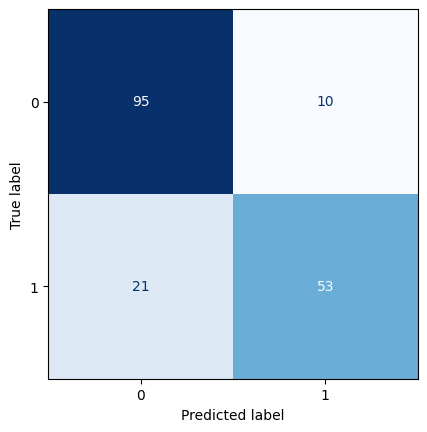

In [5]:
predictions = model.predict(x_test)
cm = confusion_matrix(y_test, predictions)

print(f'Precision: {precision_score(y_test, predictions) * 100:.2f}%')
print(f'Recall: {recall_score(y_test, predictions) * 100:.2f}%')
print(f'F1: {f1_score(y_test, predictions) * 100:.2f}%')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(colorbar=False, cmap='Blues')
plt.grid(False)